# 1-Imports


In [7]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
# from  import load_split_csv, image_to_array

# 2-Load Features


In [8]:
X_train = np.load("../features/train_features.npy")
y_train = np.load("../features/train_labels.npy")

X_val = np.load("../features/val_features.npy")
y_val = np.load("../features/val_labels.npy")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)


Train: (3000, 157) (3000,)
Val:   (373, 157) (373,)


# 3-Sanity check

In [9]:
print("Feature min:", X_train.min())
print("Feature max:", X_train.max())
print("Mean:", X_train.mean())
print("Std:", X_train.std())


Feature min: 0.0
Feature max: 16.0
Mean: 0.6183690298543284
Std: 1.5578276681660606


# 4-SVM Pipeline

In [16]:
class_weights = {0:1.0, 1:1.0, 2:1.2, 3:1.5, 4:1.5, 5:2.0} 
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA(n_components=0.95, random_state=42)), 
    ('svm', SVC(kernel='rbf', C=10.0, gamma='scale', class_weight=class_weights))
])

# 5-Training SVM


In [17]:

print("Training SVM...")
svm_pipeline.fit(X_train, y_train)
print("Training done.")


Training SVM...
Training done.


# 6-Validation Evaluation

In [18]:
y_pred = svm_pipeline.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Validation Accuracy: 0.8042895442359249

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        72
           1       0.87      0.85      0.86        91
           2       0.81      0.98      0.89        45
           3       0.90      0.79      0.84        81
           4       0.67      0.60      0.63        60
           5       0.75      0.75      0.75        24

    accuracy                           0.80       373
   macro avg       0.79      0.80      0.79       373
weighted avg       0.81      0.80      0.80       373


Confusion Matrix:
[[61  2  0  1  8  0]
 [ 4 77  4  2  3  1]
 [ 0  1 44  0  0  0]
 [ 5  4  1 64  6  1]
 [10  2  4  4 36  4]
 [ 1  3  1  0  1 18]]


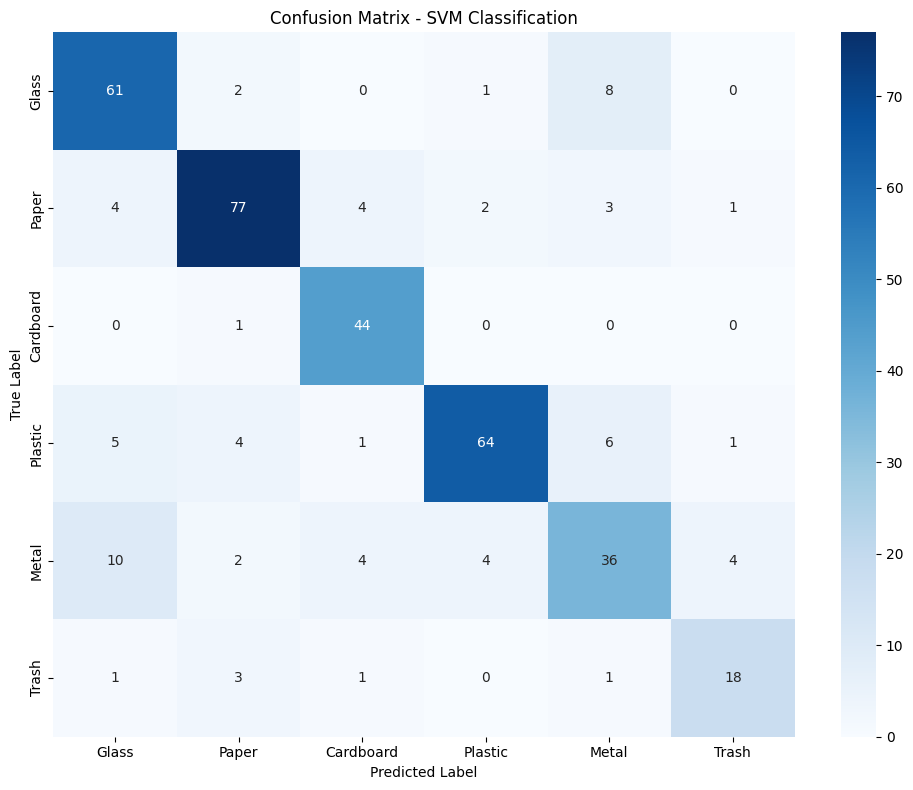

In [19]:
# 7-Confusion Matrix Visualization

# Class names for better labels
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash']

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [14]:
# # Also show normalized confusion matrix
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
#             xticklabels=class_names, yticklabels=class_names)
# plt.title('Normalized Confusion Matrix - SVM Classification')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()

In [15]:
# # 8-Error Analysis

# val_paths, _ = load_split_csv("../data/splits/val_paths.csv")

# misclassified = y_val != y_val_pred
# misclassified_indices = np.where(misclassified)[0]
# print(f"Number of misclassified samples: {len(misclassified_indices)}")

# # Visualize some misclassified images
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# for i, idx in enumerate(misclassified_indices[:10]):
#     img = image_to_array(val_paths[idx])
#     ax = axes[i // 5, i % 5]
#     ax.imshow(img)
#     ax.set_title(f"True: {class_names[y_val[idx]]}\nPred: {class_names[y_val_pred[idx]]}", fontsize=8)
#     ax.axis('off')
# plt.tight_layout()
# plt.show()